In [242]:
using Interpolations
using Distributed
using DataFrames
using Printf
using JLD
using CSV
using Dierckx
using Dates
using PyPlot
# using PyCall
using Seaborn
using LaTeXStrings

main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
# push!(LOAD_PATH, module_path)
modls = ["ModelObj", "AnalyticFunctions", "BondPrInterp",
         "EqFinDiff", "Batch", "ModelPlots", "JointEq"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end
ENV["LINES"] = 750
ENV["COLUMNS"] = 1000

1000

In [2]:
bt, svm = Batch.get_bt_svm(; m=1., m_comb_num=49)

Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading SVM object...
Batch object file not found.
Batch Object is incompatible! Loading surfaces only instead.
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Interpolating Bond Pricing Surfaces...
  4.672772 seconds (10.08 M allocations: 594.148 MiB, 5.06% gc time)
Batch object exists: true
Interpolating bond pricing surfaces...
  0.193788 seconds (811.42 k allocations: 137.112 MiB, 9.14% gc time)


(Main.Batch.BatchStruct
  model: String "svm"
  dfn: Main.Batch.DirFileNames
  dfc: Main.Batch.BatchDFColumns
  mi: Main.Batch.ModelInputs
  bp: Main.Batch.BatchParams
  coupon_grid: Array{Float64}((22,)) [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0  …  6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
  pvb_tol_vec: Array{Float64}((4,)) [1.0e-6, 1.0e-5, 0.0001, 0.001]
, ModelObj.Firm
  mu_b: Float64 1.0
  m: Float64 1.0
  c: Float64 NaN
  p: Float64 NaN
  vbl: Float64 NaN
  vbh: Float64 NaN
  pm: ModelObj.FirmParams
  model: String "svm"
  bi: ModelObj.BPrInputs
  bs: ModelObj.BPrSurfs
  bf: ModelObj.BPrInterpFuns
  bit: ModelObj.BPrFixedTTMInputs
  bft: ModelObj.BPrInterpFuns
  optKS: ModelObj.KStruct
)

In [7]:
readdir("/mnt/ide0/home/artur/BondPricing/Julia/Results/SVM/m_1.00/")

154-element Array{String,1}:
 "mu_b_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150__sigmah_0.200"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150___sigmah_0.200"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150___sigmah_0.230"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150___sigmah_0.250"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150___sigmah_0.280"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150___sigmah_0.300"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.100__sigmal_0.150___sigmah_0.350"
 "mub_1.00__xi_1.00__kappa_10.00_bp__gross_delta_200.00_bp__iota_0.00_bp__lambda_0.200__sigmal_0.150___sigmah_0.200"
 "mub_1.00__xi_1.00__kappa_10.00_bp

# CVM Plots

In [90]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plot_script_name = "cvm_plots_script.jl"
include(string(plot_script_path, "/", "cvm_plots_script.jl"))

Loading optimal results dataframe...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...


In [99]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plot_script_name = "svm_plots_script.jl"
include(string(plot_script_path, "/", plot_script_name))

Loading optimal results dataframe...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_

In [6]:
bt = Batch.BatchObj()
pt = ModelPlots.PlotsObj(bt; firm_obj_fun=:firm_value, cvm_m =1., svm_m =1.)
pt.cvm_data

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...


,comb_num,m,m_comb_num,obj_fun,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,MBR,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_vb
,Int64,Float64,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,1.0,1,firm_value,0.02,0.02,0.0,0.0025,NaN,NaN,0.15,1.0,4.64646,56.3206,59.7399,NaN,NaN,-0.000434757,NaN,NaN,56.3206,56.3202,55.4928,55.4935,111.814,50.3697,27.046,100.0,0.08,0.6,0.27,1.0,0.000434757,-7.71933e-6,7.71933e-6,2.94875e-13
2,2,1.0,2,firm_value,0.02,0.02,0.0,0.005,NaN,NaN,0.15,1.0,4.68739,55.1382,59.1051,NaN,NaN,5.40764e-6,NaN,NaN,55.1383,55.1382,55.3474,55.3458,110.484,49.9061,23.3696,100.0,0.08,0.6,0.27,1.0,5.40764e-6,9.80743e-8,9.80743e-8,-5.40012e-13
3,3,1.0,3,firm_value,0.02,0.02,0.0,0.01,NaN,NaN,0.15,1.0,4.71435,52.3777,57.3252,NaN,NaN,6.09178e-5,NaN,NaN,52.3777,52.3778,55.5615,55.5602,107.938,48.5258,16.6687,100.0,0.08,0.6,0.27,1.0,6.09178e-5,1.16305e-6,1.16305e-6,3.19744e-14
4,4,1.0,4,firm_value,0.02,0.02,0.0,0.015,NaN,NaN,0.15,1.0,4.67269,49.185,54.9394,NaN,NaN,3.20134e-5,NaN,NaN,49.185,49.185,56.3722,56.3722,105.557,46.5956,10.9362,100.0,0.08,0.6,0.27,1.0,3.20134e-5,6.50877e-7,6.50877e-7,2.13163e-13
5,5,1.0,5,firm_value,0.02,0.01995,5.0e-5,0.0025,NaN,NaN,0.15,1.0,4.64819,56.3375,59.8457,NaN,NaN,-0.000296972,NaN,NaN,56.3374,56.3372,55.2167,55.2165,111.554,50.5023,26.4611,100.0,0.08,0.6,0.27,1.0,0.000296972,-5.2713e-6,5.2713e-6,1.112e-12
6,6,1.0,6,firm_value,0.02,0.01995,5.0e-5,0.005,NaN,NaN,0.15,1.0,4.68249,55.0814,59.1315,NaN,NaN,-3.32439e-5,NaN,NaN,55.0815,55.0814,55.1442,55.1428,110.224,49.9721,22.7616,100.0,0.08,0.6,0.27,1.0,3.32439e-5,-6.0354e-7,6.0354e-7,-5.3646e-13
7,7,1.0,7,firm_value,0.02,0.01995,5.0e-5,0.01,NaN,NaN,0.15,1.0,4.71067,52.3373,57.3656,NaN,NaN,4.02334e-5,NaN,NaN,52.3373,52.3374,55.3448,55.3436,107.681,48.6041,16.1153,100.0,0.08,0.6,0.27,1.0,4.02334e-5,7.68732e-7,7.68732e-7,4.15668e-13
8,8,1.0,8,firm_value,0.02,0.01995,5.0e-5,0.015,NaN,NaN,0.15,1.0,4.66902,49.146,54.9769,NaN,NaN,4.7031e-5,NaN,NaN,49.146,49.146,56.1569,56.1568,105.303,46.6711,10.4275,100.0,0.08,0.6,0.27,1.0,4.7031e-5,9.56966e-7,9.56966e-7,8.88178e-14
9,9,1.0,9,firm_value,0.02,0.0199,0.0001,0.0025,NaN,NaN,0.15,1.0,4.64329,56.2774,59.8702,NaN,NaN,-0.000274419,NaN,NaN,56.2774,56.2772,55.0158,55.0157,111.293,50.5667,25.8283,100.0,0.08,0.6,0.27,1.0,0.000274419,-4.87618e-6,4.87618e-6,2.8777e-13


In [85]:
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

for var in keys(ModelPlots.vartitles)
   ModelPlots.plot_cvm_optimal_solutions(pt, var; figaspect=.55, 
                                         save_fig=true)
   PyPlot.close()
end

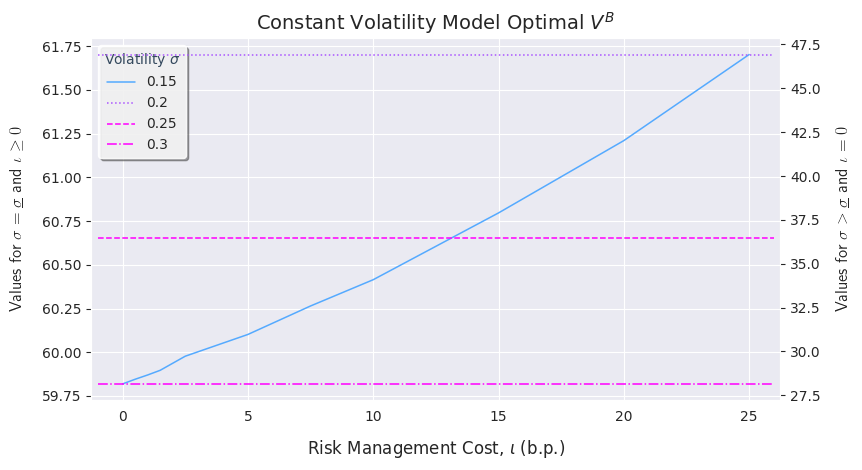

(Figure(PyObject <Figure size 872.727x480 with 2 Axes>), "/mnt/ide0/home/artur/BondPricing/Julia/Plots/CVM/mu_b_1.00__m_1.00__xi_1.00__kappa_(bp)_25.00__sigmal_0.15", "cvm_fv_opt_vb")

In [69]:
   fig, folder_path, file_name =  ModelPlots.plot_cvm_optimal_solutions(pt, :vb; figaspect=.55, 
        save_fig=true)

# SVM HeatMaps and Surfaces

In [49]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [100]:
bt = Batch.BatchObj()
pt = ModelPlots.PlotsObj(bt; firm_obj_fun=:mbr, svm_m =1.)
pt.svm_data

Loading optimal results dataframe...
Unable to load optimal results dataframe. Recomputing...
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Constant Volatility Model: setting vbh to vbl, lambda to NaN
  0.082052 seconds (68.40 k allocations: 8.411 MiB)
Unable to load CVM data
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...


,comb_num,m,m_comb_num,obj_fun,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,MBR,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,1,1.0,1,MBR,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,5.00285,61.7664,66.5139,65.1,66.1599,-0.000111483,-4.36033e-5,0.00122507,61.7664,61.7663,47.5976,47.5968,109.363,56.4782,24.489,100.0,0.08,0.6,0.27,1.0,0.000111483,-1.80491e-6,1.80491e-6,-4.36033e-5,false,0.0
2,2,1.0,2,MBR,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,4.9598,60.1566,65.1544,63.8118,64.7706,-0.0015213,0.000109018,0.00115394,60.1566,60.1551,48.7549,48.757,108.912,55.2327,22.367,100.0,0.08,0.6,0.27,1.0,0.0015213,-2.5289e-5,2.5289e-5,0.000109018,false,0.0
3,3,1.0,3,MBR,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,4.94929,59.6644,64.7441,63.4236,64.3505,-0.00138663,0.000121017,0.00115177,59.6644,59.663,49.0822,49.0835,108.747,54.8643,21.6836,100.0,0.08,0.6,0.27,1.0,0.00138663,-2.32406e-5,2.32406e-5,0.000121017,false,0.0
4,4,1.0,4,MBR,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,4.93144,58.7291,63.9705,62.6925,63.5579,-0.000875117,0.000295589,0.00108855,58.7291,58.7282,49.6714,49.6726,108.401,54.1769,20.3548,100.0,0.08,0.6,0.27,1.0,0.000875117,-1.49009e-5,1.49009e-5,0.000295589,false,0.0
5,5,1.0,5,MBR,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,4.91464,57.837,63.2369,62.0001,62.8059,-0.000729402,0.000241284,0.00107932,57.837,57.8362,50.2002,50.1986,108.035,53.5348,19.0562,100.0,0.08,0.6,0.27,1.0,0.000729402,-1.26113e-5,1.26113e-5,0.000241284,false,0.0
6,6,1.0,6,MBR,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,4.67417,57.8251,62.6966,60.9551,61.9445,-0.00470501,-0.000178523,0.00106908,57.8251,57.8204,51.3199,51.3383,109.159,52.9691,21.7136,100.0,0.08,0.6,0.27,1.0,0.00470501,-8.13662e-5,8.13662e-5,-0.000178523,false,0.0
7,7,1.0,7,MBR,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,4.69307,56.9768,62.1159,60.4431,61.3498,-0.0036576,-6.1053e-5,0.00106635,56.9768,56.9731,51.5523,51.5616,108.535,52.493,19.836,100.0,0.08,0.6,0.27,1.0,0.0036576,-6.41945e-5,6.41945e-5,-6.1053e-5,false,0.0
8,8,1.0,8,MBR,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,4.69832,56.6846,61.9094,60.2596,61.1391,-0.00316218,-7.41536e-5,0.00106212,56.6846,56.6814,51.6432,51.6494,108.331,52.3225,19.2315,100.0,0.08,0.6,0.27,1.0,0.00316218,-5.57855e-5,5.57855e-5,-7.41536e-5,false,0.0
9,9,1.0,9,MBR,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,4.70567,56.0713,61.4617,59.8578,60.6833,-0.00210013,-1.52409e-5,0.00105935,56.0713,56.0692,51.8609,51.8611,107.93,51.9495,18.0517,100.0,0.08,0.6,0.27,1.0,0.00210013,-3.74546e-5,3.74546e-5,-1.52409e-5,false,0.0


In [44]:
df = Batch.conditionally_load_df(:DFI, debt_at_par_cp_path_fname)

# Filter DataFrame
fdf = Batch.filter_batch_I_df(bt, svm, df; tol=.05)

# DataFrame Size:
println(string("Part I DF length: ", size(df, 1)))
println(string("Part I Filtered DF length: ", size(fdf, 1)))

Part I DF length: 320
Part I Filtered DF length: 320
  0.294058 seconds (476.40 k allocations: 22.120 MiB, 3.58% gc time)


MethodError: MethodError: no method matching iterate(::RemoteException)
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:568
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:568
  iterate(!Matched::ExponentialBackOff) at error.jl:199
  ...

In [13]:
readdir(bt.mi.batch_res_path)

ff(bt, x) = string(x, ":  ", Dates.unix2datetime(stat(string(bt.mi.batch_res_path, "/", x)).mtime))
[ff(bt,x) for x in readdir(bt.mi.batch_res_path) if !occursin("xi", x)]

6-element Array{String,1}:
 "m_1.0:  2019-02-20T21:02:58.742"            
 "m_10.0:  2019-02-09T17:57:36.655"           
 "m_3.0:  2019-02-09T17:55:18.77"             
 "m_5.0:  2019-02-09T17:55:51.489"            
 "m_7.0:  2019-02-09T17:56:58.919"            
 "opt_k_structs.csv:  2019-03-14T01:09:07.517"

In [7]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [35]:
pt = ModelPlots.PlotsObj(bt; svm_m =1.)

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...


Main.ModelPlots.PlotStruct
  bt: Main.Batch.BatchStruct
  cvm_data: DataFrame  1040 observations of 35 variables

  svm_data: DataFrame  150 observations of 36 variables

  _svm_surf: DataFrame  0 observations of 0 variables

  xylabels: Dict{Symbol,Array{String,1}}
  zlabels: Dict{Symbol,Array{String,1}}


In [3]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plot_script_name = "svm_plots_script.jl"
include(string(plot_script_path, "/", plot_script_name))

Loading optimal results dataframe...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_

In [13]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

# CVM vs SVM Plots

#### Transaction Costs, Risk-Management Costs, Volatility-Risk Intensity

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


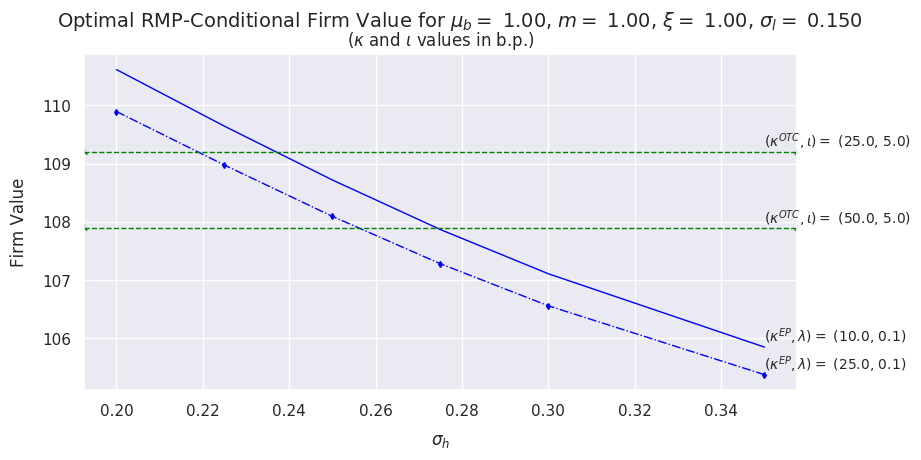

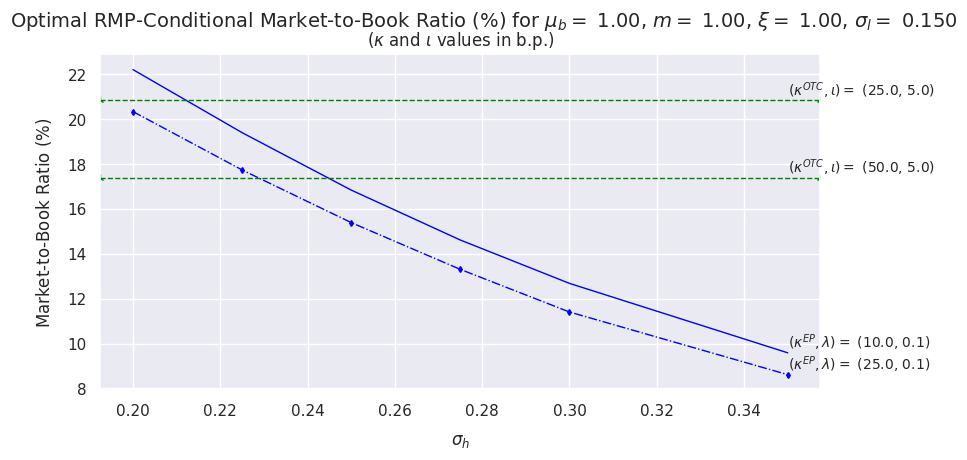

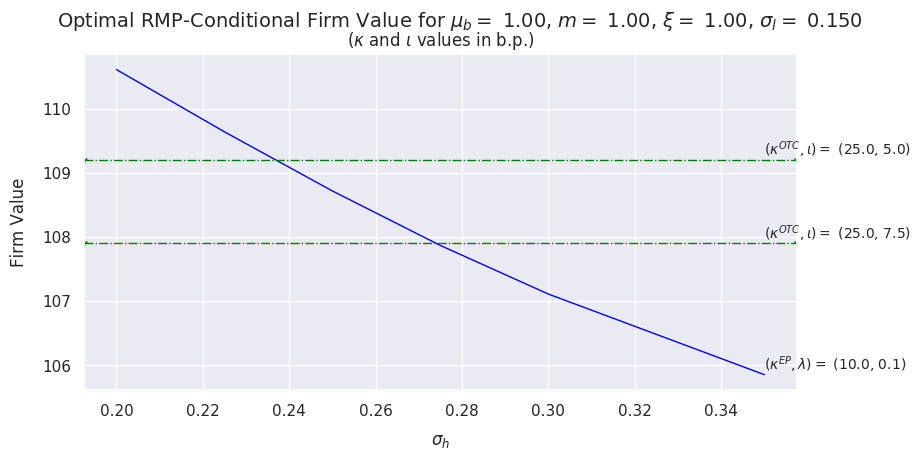

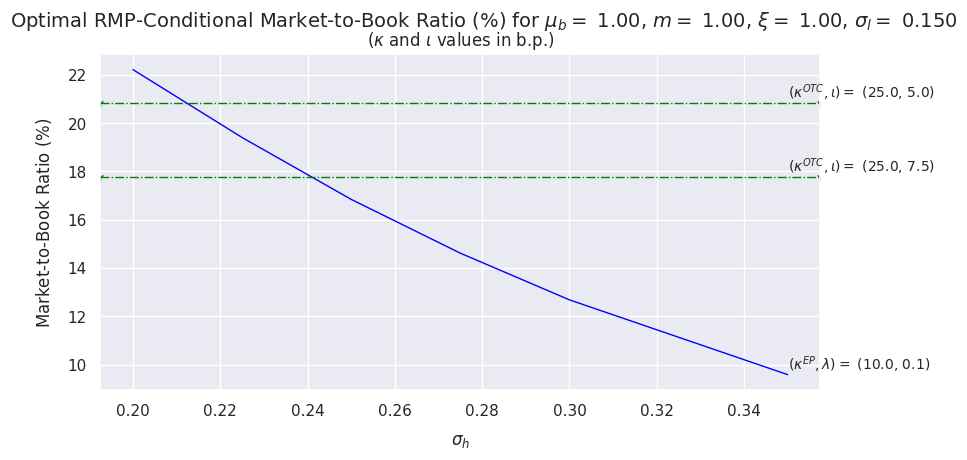

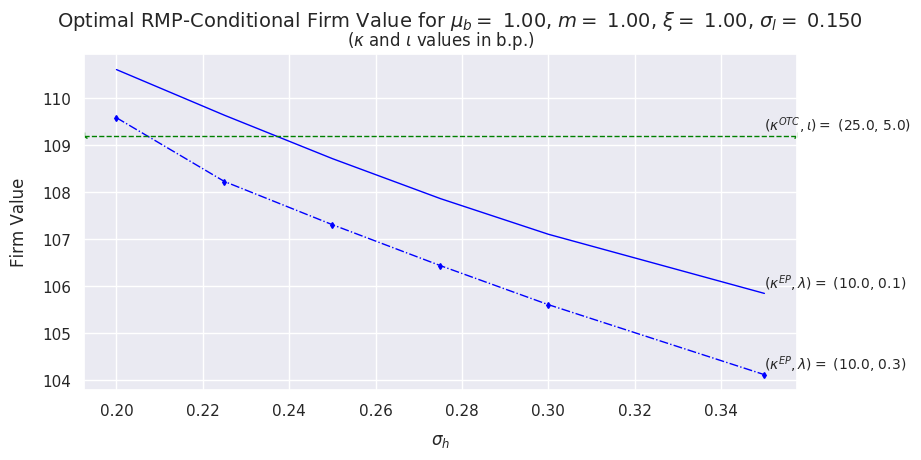

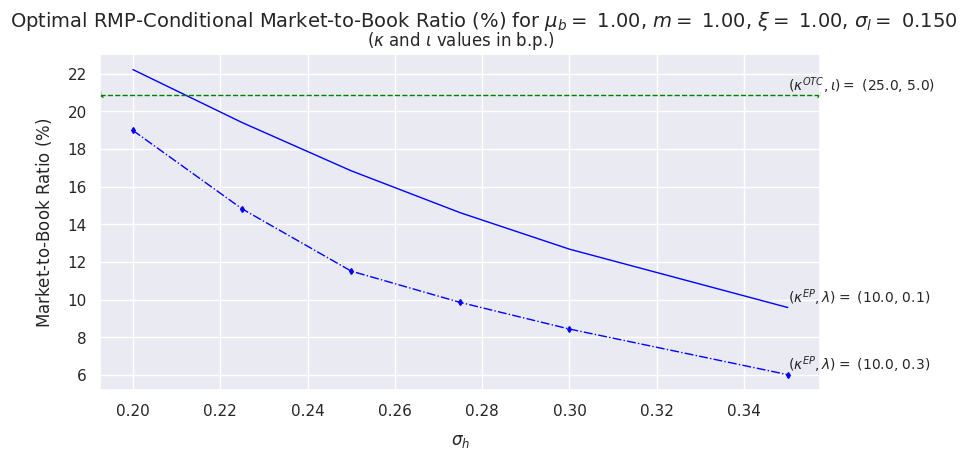

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


In [6]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plot_script_name = "cvm_vs_svm_plots_script.jl"
include(string(plot_script_path, "/", plot_script_name))

# Risk-Management Policy - iota

## Full Information

In [154]:
modls = ["ModelObj", "AnalyticFunctions", "BondPrInterp",
         "EqFinDiff", "Batch", "ModelPlots", "JointEq"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...


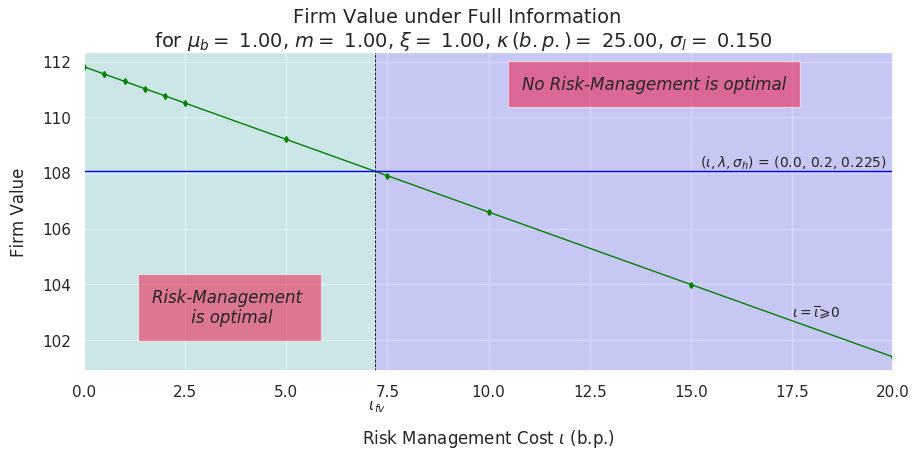

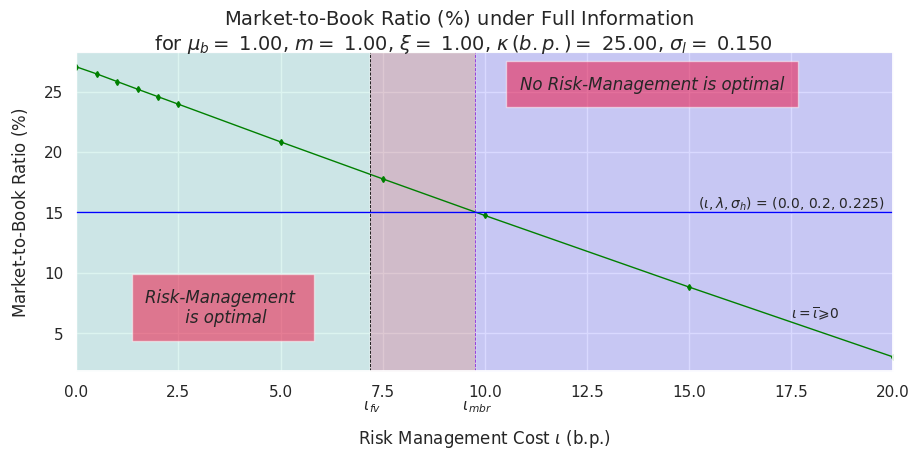

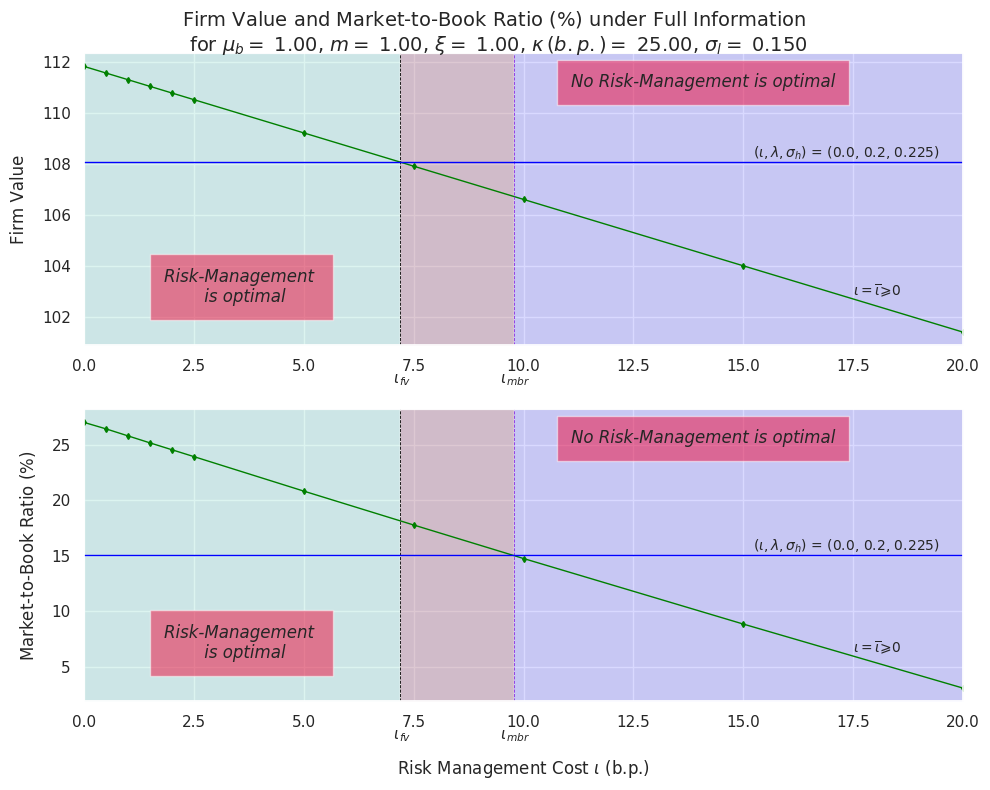

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


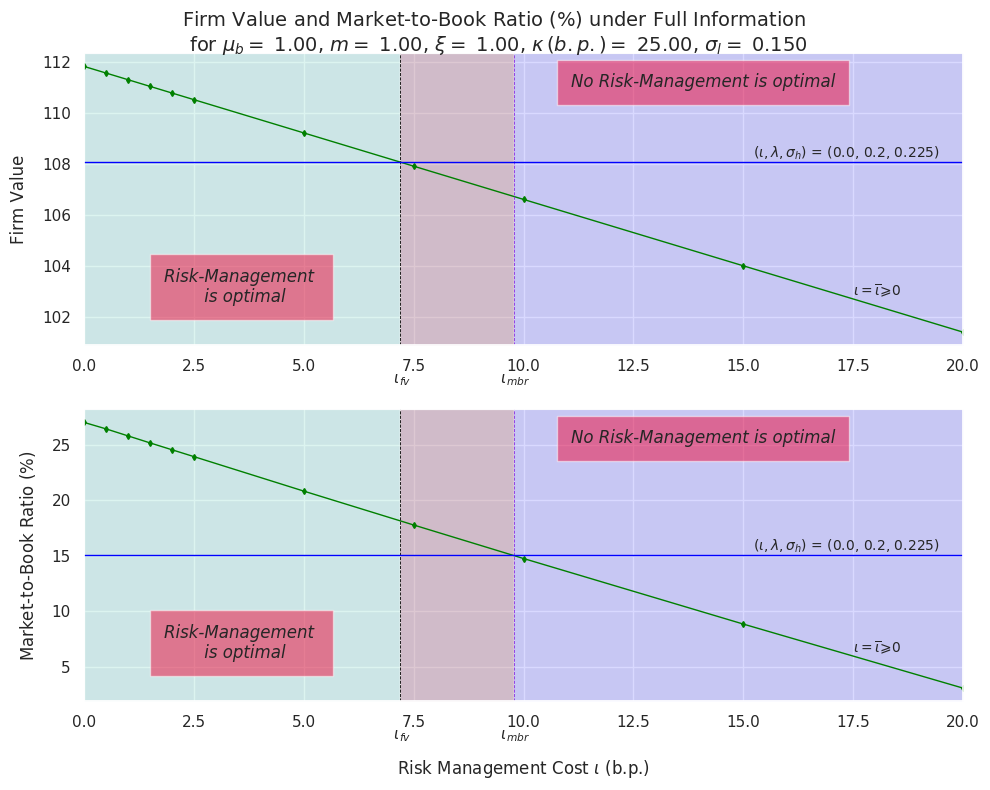

In [244]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plots_xvar_dir = "rmp_iota"
plot_script_name = "rmp_fi_iota_plots.jl"
include(string(plot_script_path, "/", plots_xvar_dir, "/", plot_script_name))

## Misrepresentation

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using unique combination ID...
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Constant Volatility Model: setting vbh to vbl, lambda to NaN
Setting parameter dictionary using unique combination ID...
Loading SVM object...
Batch object file not found.
Batch Object is incompatible! Loading surfaces only instead.
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Interpolating Bond Pricing Surfaces...
  0.256637 seconds (811.43 k allocations: 137.113 MiB, 29.82% gc time)
Batch object exists: true
Interpolating bond pricing surfaces...
  0.251946 seconds (811.43 k allocations: 137.113 MiB, 30.37% gc time)
Setting parameter dictionary using unique combination ID...
Loading SVM object...
Batch object file not found.
Batch Object is incompatible! Lo

Computing equity values... 
V0: 100.0; equity: 51.290407055553416
Equity Core Function Computation Time: 0.05502796173095703
Total Equity FD Core Function Computation Time: 0.15804004669189453
Total computation time: 0.19844388961791992
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 341.6865524473856
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.0084381103515625
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 51.20107408131136
Equity Core Function Computation Time: 0.0547640323638916
Total Equity FD Core Function Computation Time: 0.15497398376464844
Total computation time: 0.19530296325683594
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1:

Computing equity values... 
V0: 100.0; equity: 51.542177071243394
Equity Core Function Computation Time: 0.0471038818359375
Total Equity FD Core Function Computation Time: 0.12737417221069336
Total computation time: 0.16742491722106934
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 341.6865524473856
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008198022842407227
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 51.54988148253171
Equity Core Function Computation Time: 0.04750394821166992
Total Equity FD Core Function Computation Time: 0.12759900093078613
Total computation time: 0.16776514053344727
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi

Computing equity values... 
V0: 100.0; equity: 50.78413723353386
Equity Core Function Computation Time: 0.05170702934265137
Total Equity FD Core Function Computation Time: 0.15012907981872559
Total computation time: 0.1906261444091797
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 341.6865524473856
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.00845193862915039
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 50.575186730873
Equity Core Function Computation Time: 0.05157208442687988
Total Equity FD Core Function Computation Time: 0.1500229835510254
Total computation time: 0.19052410125732422
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.

V0: 100.0; equity: 51.63748932961585
Equity Core Function Computation Time: 0.047297000885009766
Total Equity FD Core Function Computation Time: 0.12669086456298828
Total computation time: 0.3029789924621582
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9874999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 1.92142839275435
eq_vbl: 0.0
eq_vbl: 0.0
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 55.0845940358929
Equity Core Function Computation Time: 0.35207200050354004
Total Equity FD Core Function Computation Time: 0.4623889923095703
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.00826191902

Computing equity values... 
V0: 100.0; equity: 51.23082556166347
Equity Core Function Computation Time: 0.05153393745422363
Total Equity FD Core Function Computation Time: 0.14846515655517578
Total computation time: 0.34532690048217773
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9874999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 1.8209363386295963
eq_vbl: 0.0
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 341.68655244738545
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Ti

Computing equity values... 
V0: 65.12103254485406; equity: 1.8686260392377756
Equity Core Function Computation Time: 0.3192257881164551
Total Equity FD Core Function Computation Time: 0.4523911476135254
Total computation time: 0.49244093894958496
eq_vbl: 1.8686260392377756
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 52.9662903087668
Equity Core Function Computation Time: 0.0515742301940918
Total Equity FD Core Function Computation Time: 0.14156794548034668
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008316993713378906
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 50.84972594118189
Equity Core Function Computation Time: 0.050956010818481445
Total Equity FD Core Function Computation Time: 0.13489699363708496
Total computation time: 0.8240208625793457
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.

debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 1.9618786552545004
eq_vbl: 0.0
eq_vbl: 0.0
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 55.39830838031774
Equity Core Function Computation Time: 0.05132699012756348
Total Equity FD Core Function Computation Time: 0.14706182479858398
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008249998092651367
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 51.70033959113471
Equity Core Function Computation Time: 0.0508420467376709
Total Equity FD Core Function Computation Time: 0.1351909637451172
Total computation time: 0.33605003356933594
Computing Equity Vmax
Vmax: 125.0
phi0: -4

V0: 100.0; equity: 51.41916720571959
Equity Core Function Computation Time: 0.05165505409240723
Total Equity FD Core Function Computation Time: 0.14896702766418457
Total computation time: 0.3458290100097656
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9874999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 1.8574477288717284
eq_vbl: 0.0
eq_vbl: 0.0
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 54.39424288205454
Equity Core Function Computation Time: 0.3194599151611328
Total Equity FD Core Function Computation Time: 0.44464612007141113
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008296012

Computing equity values... 
V0: 63.63552735417555; equity: 2.7637378405236603
Equity Core Function Computation Time: 0.051805973052978516
Total Equity FD Core Function Computation Time: 0.14164304733276367
Total computation time: 0.14778780937194824
eq_vbl: 2.7637378405236603
eq_vbl: 0.0
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 54.38207257515968
Equity Core Function Computation Time: 0.05191397666931152
Total Equity FD Core Function Computation Time: 0.14192795753479004
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008321046829223633
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 51.312192999736965
Equity Core Function Computation Time: 0.05137205123901367
Total Equity FD Core Function Computation Time: 0.13516497611999512
Total computation time: 0.4802539348602295
Computing Equity Vmax
Vmax: 125.0
phi0: -42.252818

Computing equity values... 
V0: 100.0; equity: 54.38212456731938
Equity Core Function Computation Time: 0.05099296569824219
Total Equity FD Core Function Computation Time: 0.12444591522216797
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008332014083862305
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 51.05199027695769
Equity Core Function Computation Time: 0.31980299949645996
Total Equity FD Core Function Computation Time: 0.4516420364379883
Total computation time: 0.7947189807891846
Computing Equity Vmax
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9874999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.25281878230405
phi1: 0.9999999999999998
pv_rfdebt: 56.12855503773488
debt_abs_per_diff: 3.879025188152339e-10
eq_abs_per_diff: 0.0009234924791140404
Equity Vmax: 383.9404694897265
 
eq_max: 1.7

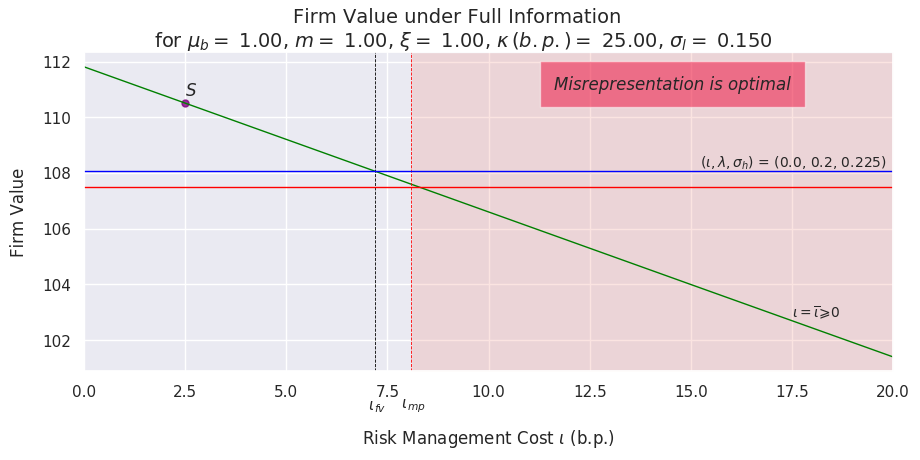

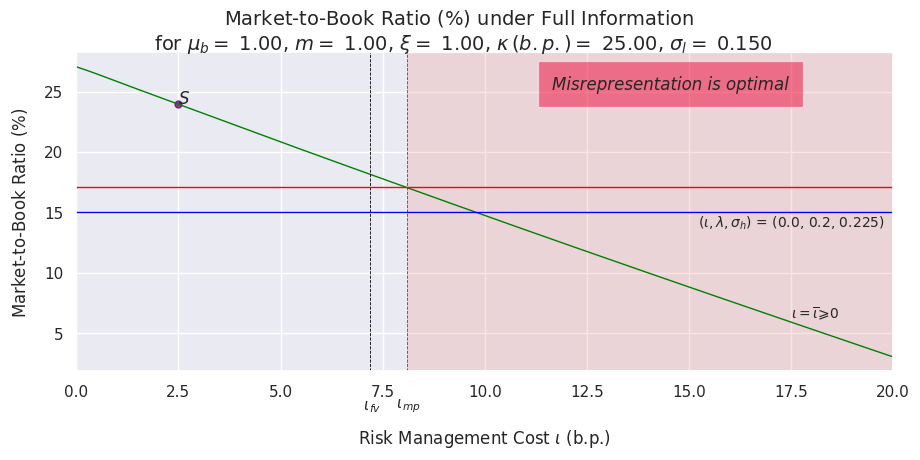

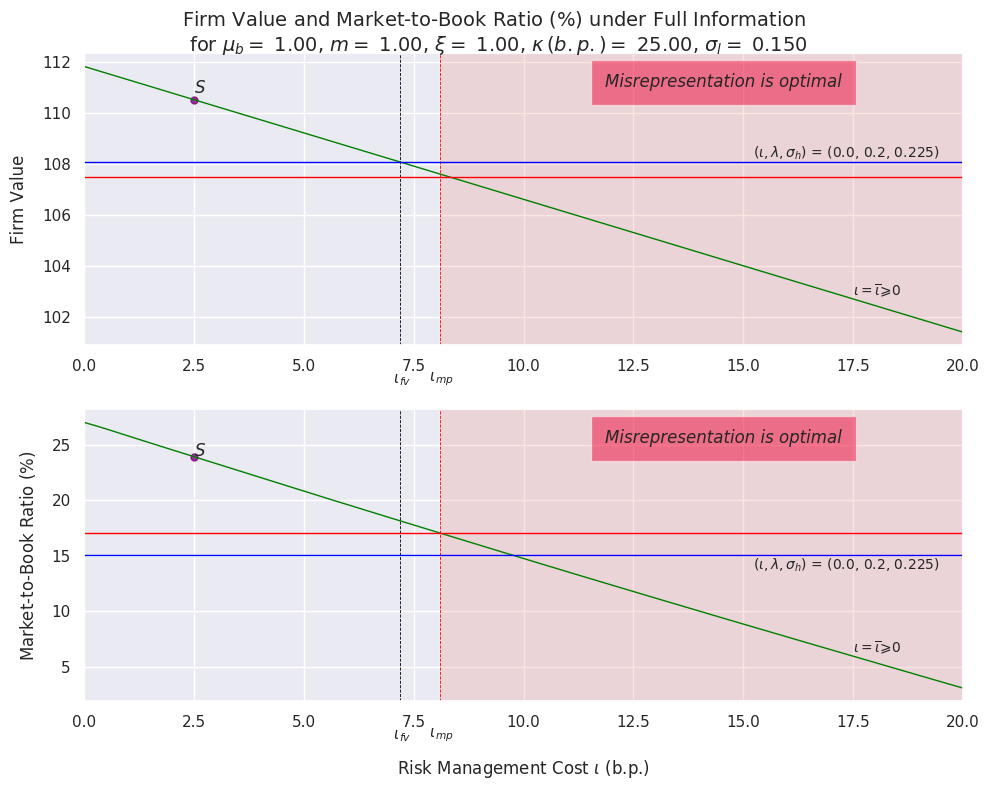

V0: 100.0; equity: 51.36130613210028
Equity Core Function Computation Time: 0.3189668655395508
Total Equity FD Core Function Computation Time: 0.450786828994751
Total computation time: 0.7929658889770508
2×31 DataFrame
│ Row │ mu_s    │ m       │ mu_b    │ c       │ p       │ fi_vb   │ sf_vb   │ rf_vb   │ vb      │ eq_deriv    │ eq_deriv_min_val │ eq_min_val │ eq_negative │ eq_vb    │ MBR     │ debt    │ equity  │ firm_value │ leverage │ iota    │ lambda  │ sigmah  │ gross_delta │ delta   │ kappa   │ sigmal  │ V0      │ xi      │ r       │ alpha   │ pi      │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64     │ Float64          │ Float64    │ Bool        │ Float64  │ Float64 │ Float64 │ Float64 │ Float64    │ Float64  │ Float64 │ Float64 │ Float64 │ Float64     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼

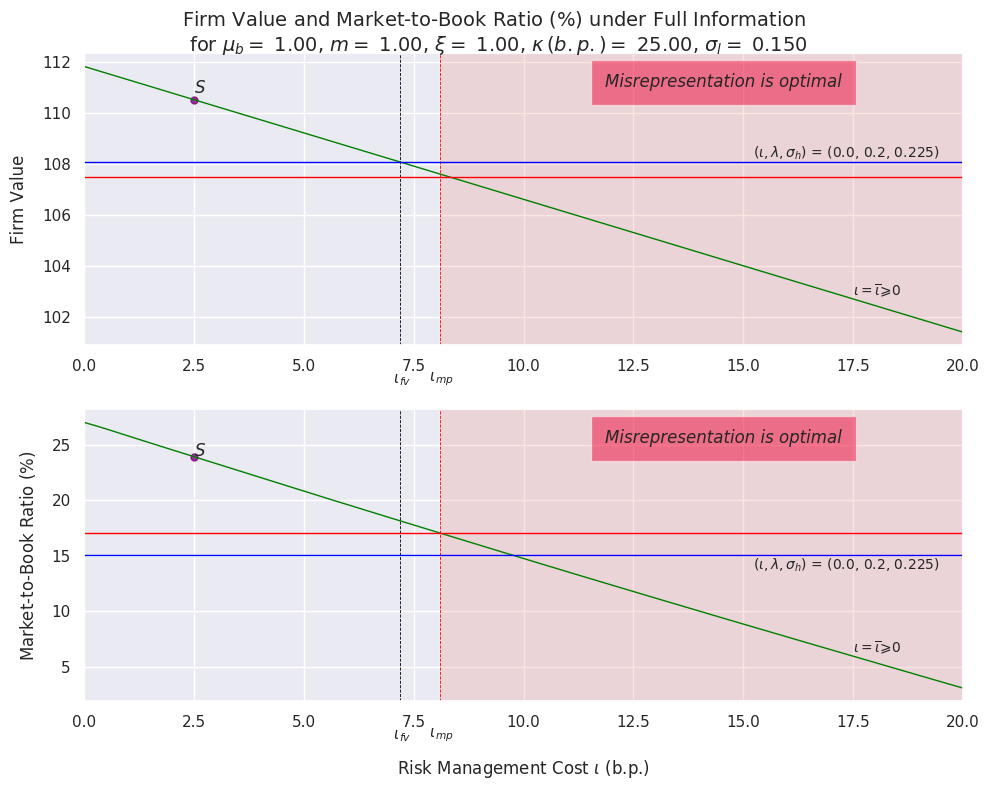

In [156]:
modls = ["ModelObj", "AnalyticFunctions", "BondPrInterp",
         "EqFinDiff", "Batch", "ModelPlots", "JointEq"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plots_xvar_dir = "rmp_iota"
plot_script_name = "rmp_misrep_iota_plots.jl"
include(string(plot_script_path, "/", plots_xvar_dir, "/", plot_script_name))


# sigmah

In [149]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots", "JointEq"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

## Full Information

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


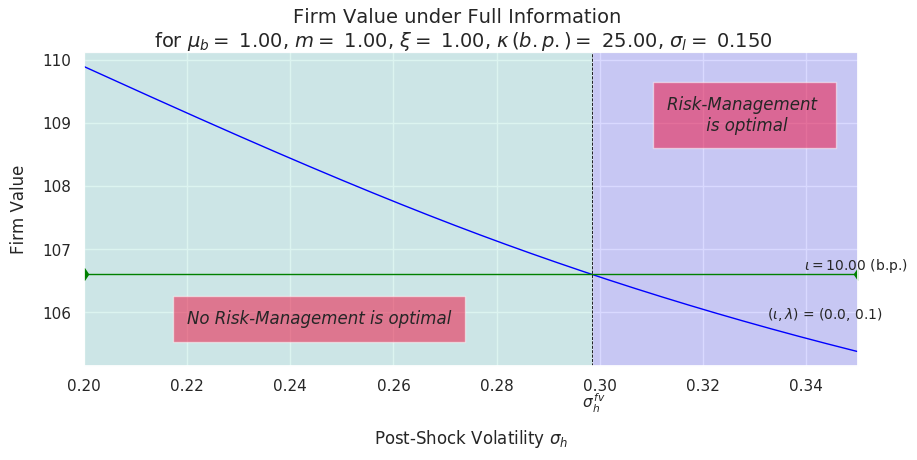

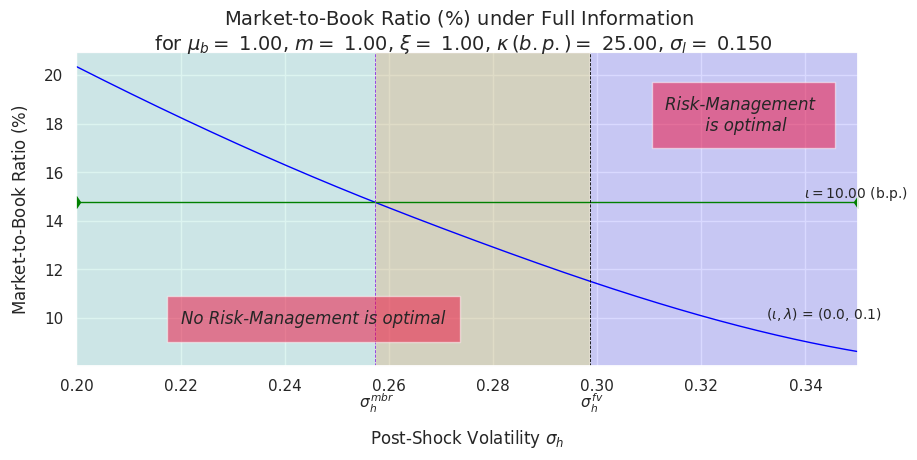

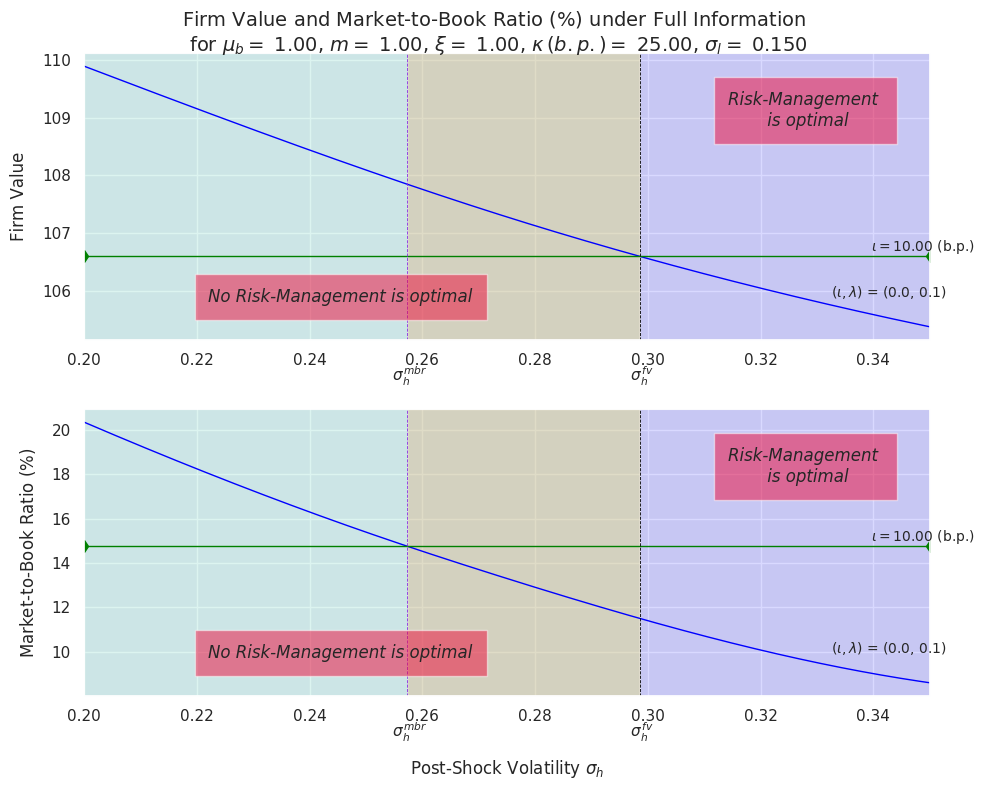

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


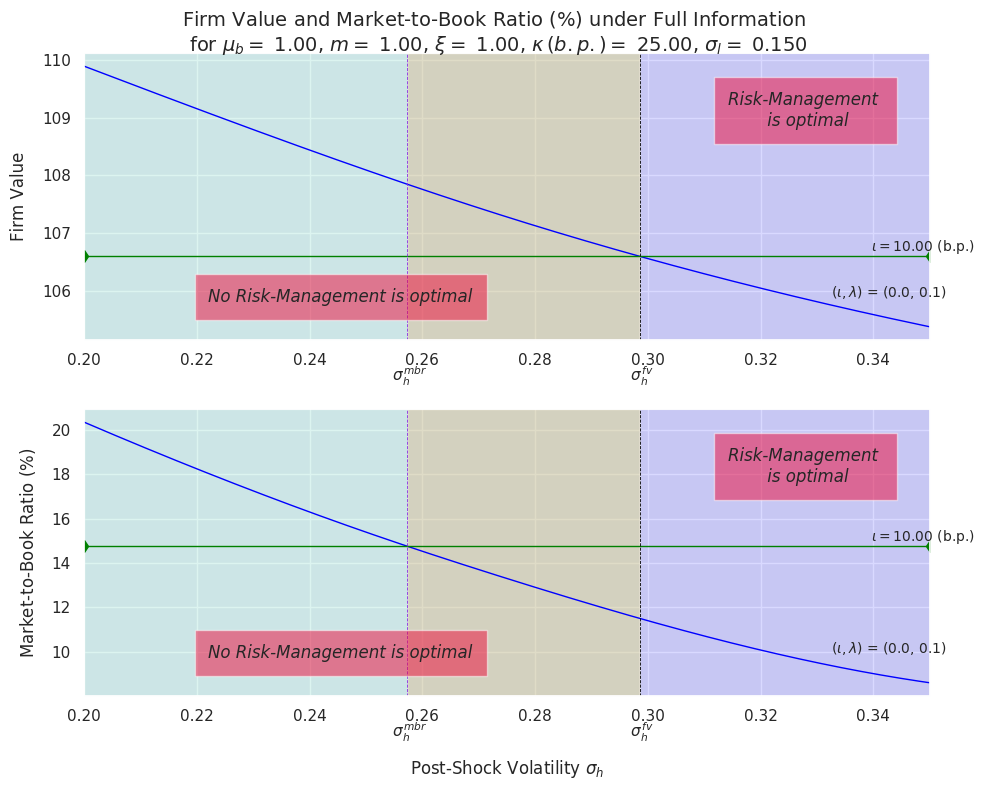

In [310]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plots_xvar_dir = "rmp_sigmah"
plot_script_name = "rmp_fi_sigmah_plots.jl"
include(string(plot_script_path, "/", plots_xvar_dir, "/", plot_script_name))

## Misrepresentation

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


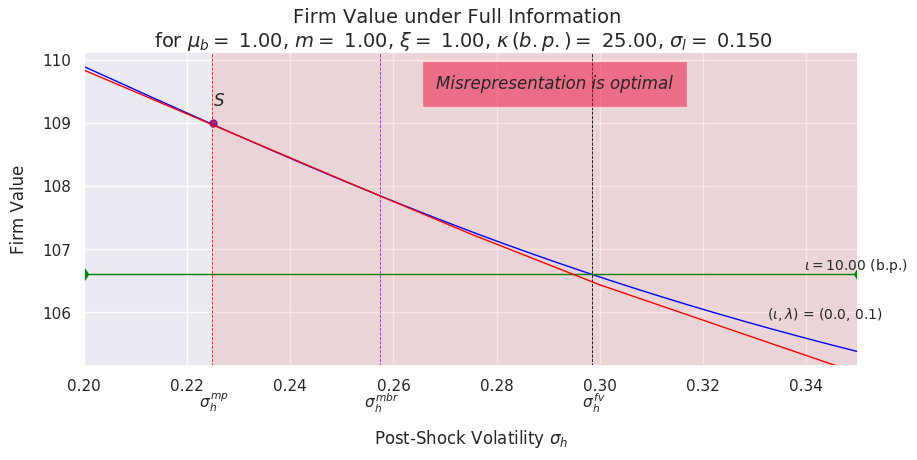

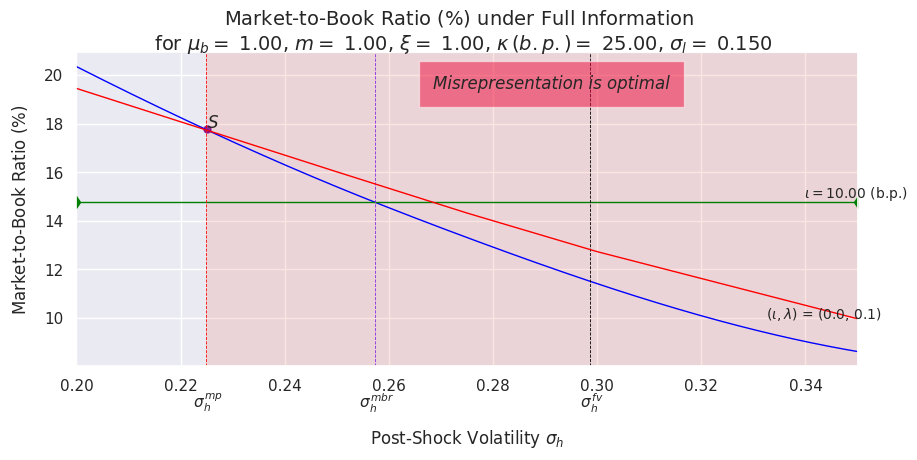

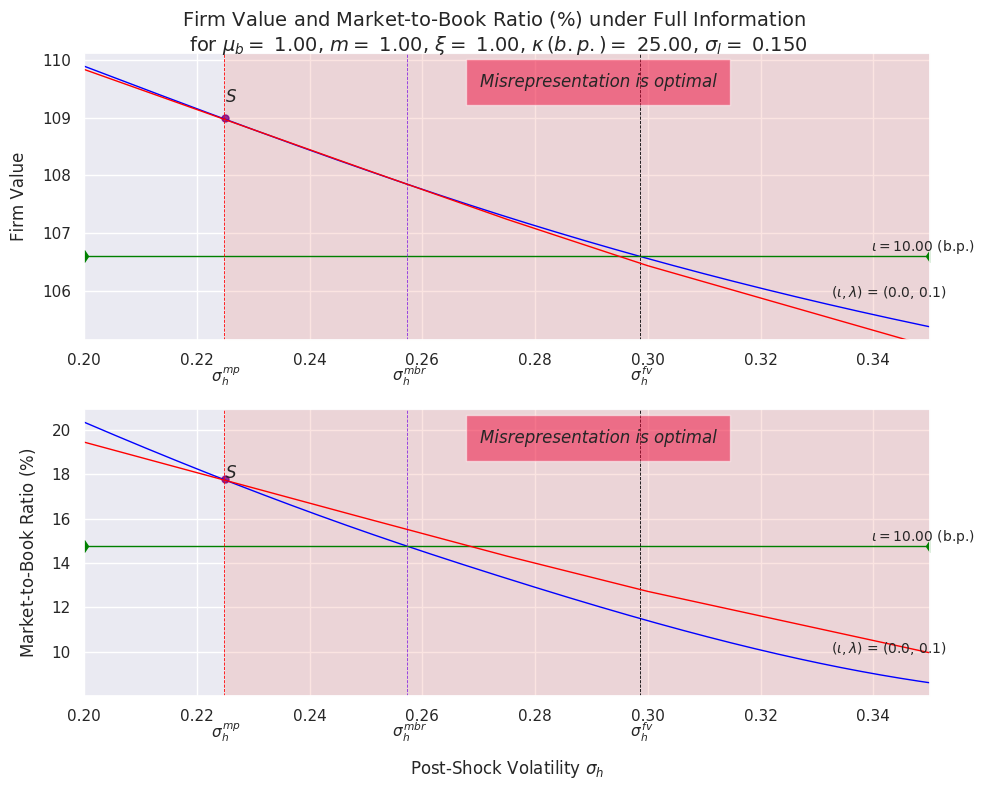

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


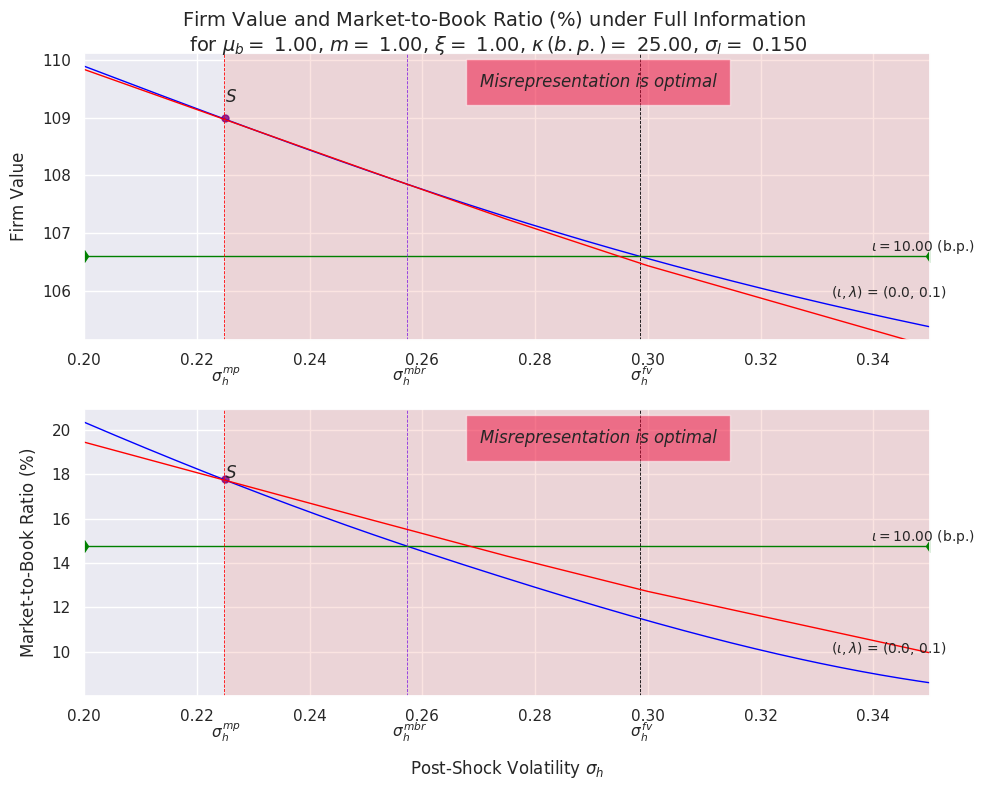

In [311]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plots_xvar_dir = "rmp_sigmah"
plot_script_name = "rmp_misrep_sigmah_plots.jl"
include(string(plot_script_path, "/", plots_xvar_dir, "/", plot_script_name))

# lambda

In [351]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots", "JointEq"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

## Full Information

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


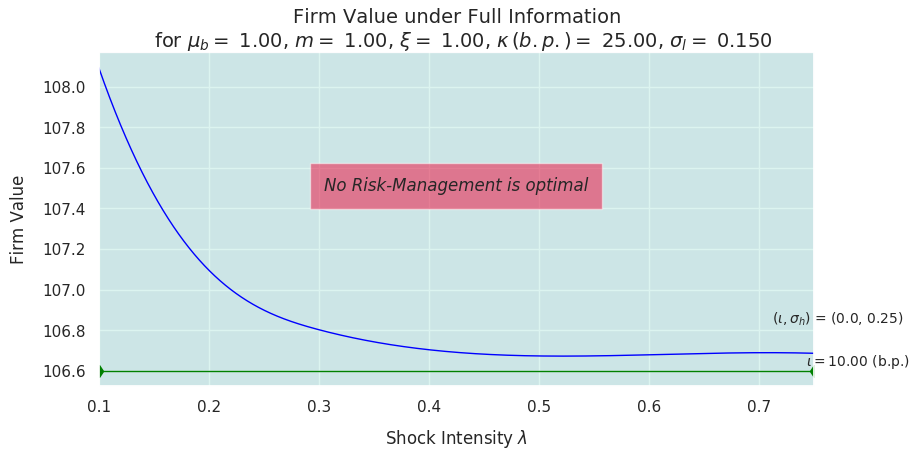

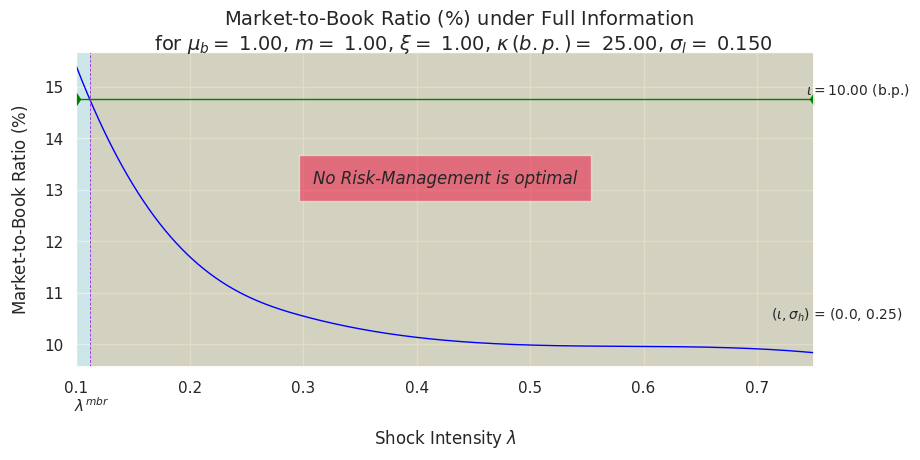

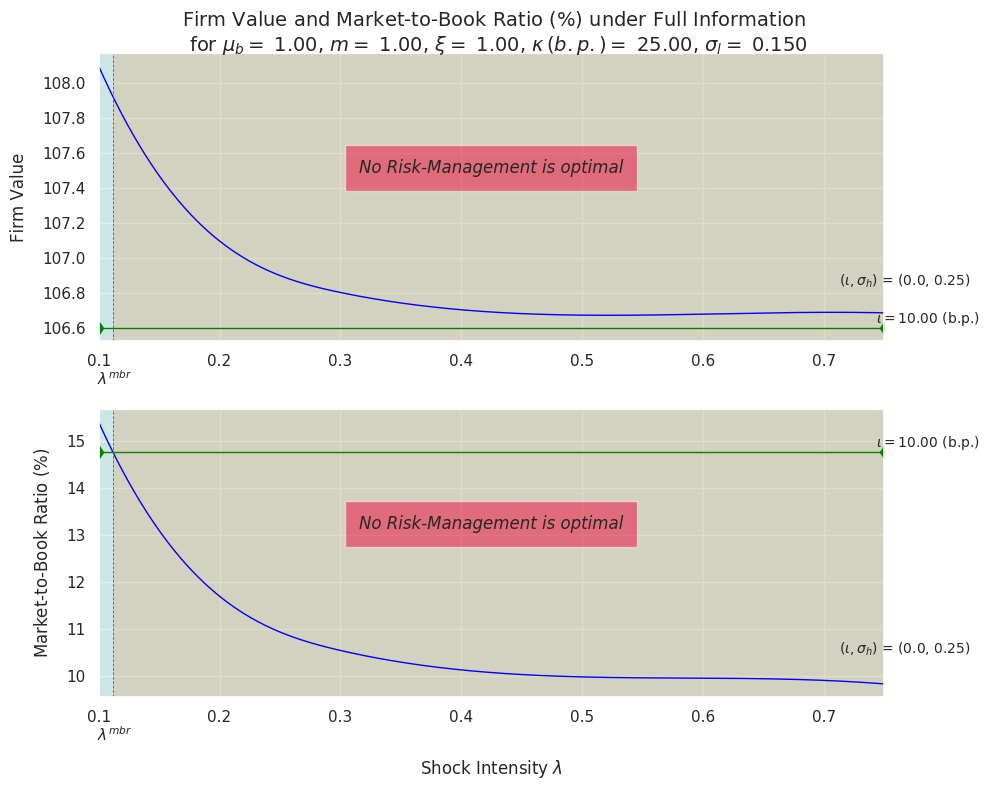

5×38 DataFrame
│ Row │ comb_num │ m       │ m_comb_num │ obj_fun    │ gross_delta │ delta   │ iota    │ kappa   │ lambda  │ sigmah  │ sigmal  │ mu_b    │ c       │ p       │ vb      │ cvml_vb │ cvmh_vb │ debt_diff   │ eq_deriv     │ eq_min_val │ sg_debt │ debt    │ sg_equity │ equity  │ firm_value │ leverage │ MBR     │ V0      │ r       │ alpha   │ pi      │ xi      │ abs_debt_diff │ debt_per_diff │ abs_debt_per_diff │ eq_deriv_min_val │ eq_negative │ eq_vb   │
│     │ Int64    │ Float64 │ Int64      │ String     │ Float64     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64     │ Float64      │ Float64    │ Float64 │ Float64 │ Float64   │ Float64 │ Float64    │ Float64  │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64       │ Float64       │ Float64           │ Float64          │ Bool        │ Float64 │
├─────┼──────────┼─────────┼────────────┼────────────┼─────────────┼─────────┼───

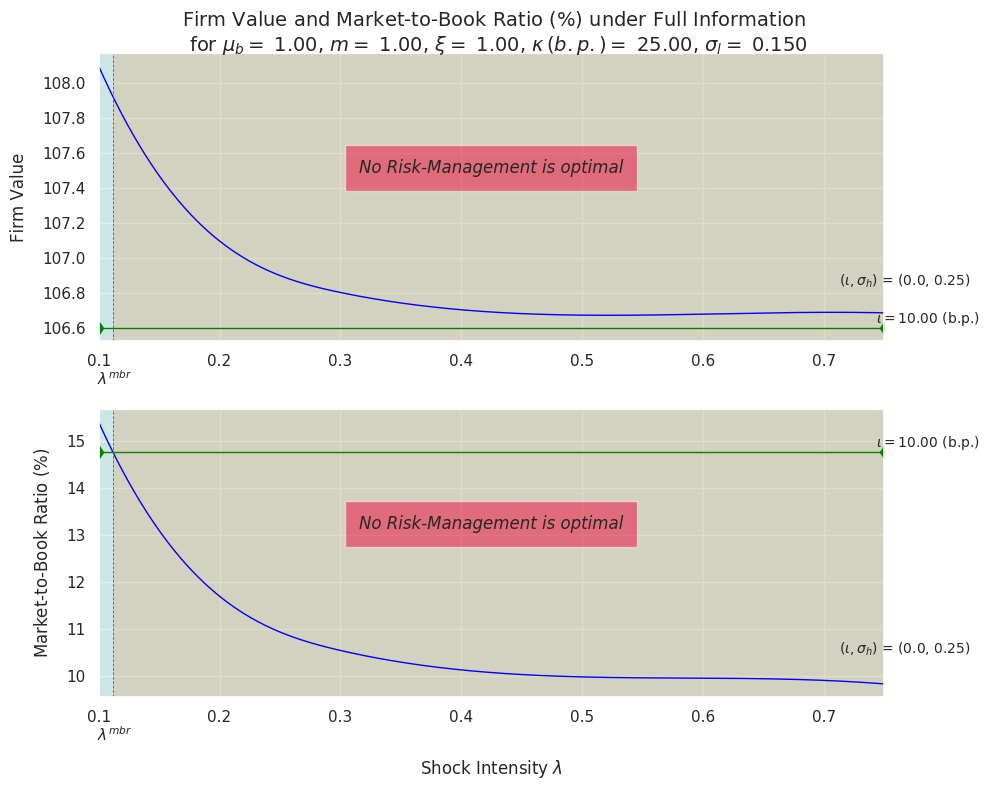

In [312]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plots_xvar_dir = "rmp_lambda"
plot_script_name = "rmp_fi_lambda_plots.jl"
rmp_fpn = string(plot_script_path, "/", plots_xvar_dir, "/", plot_script_name)
include(rmp_fpn)

## Misrepresentation

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


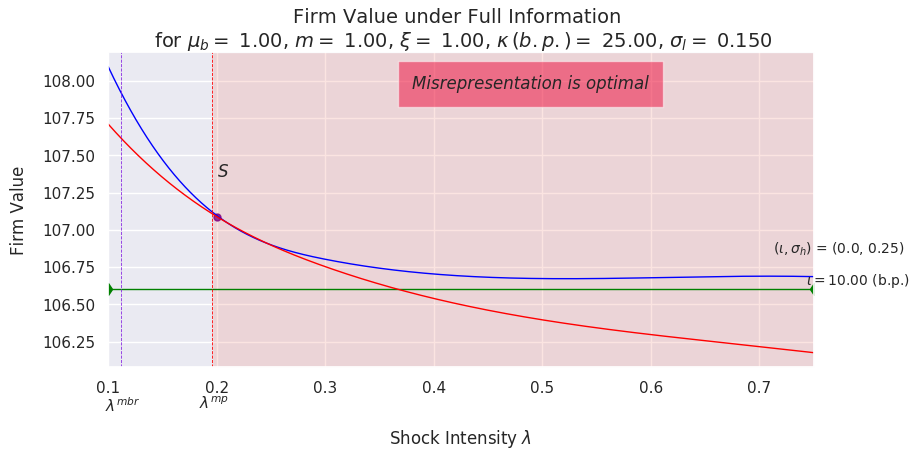

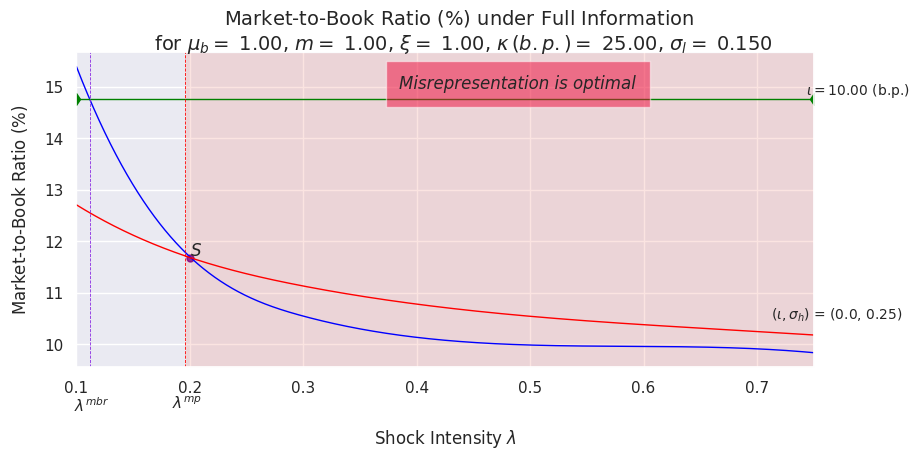

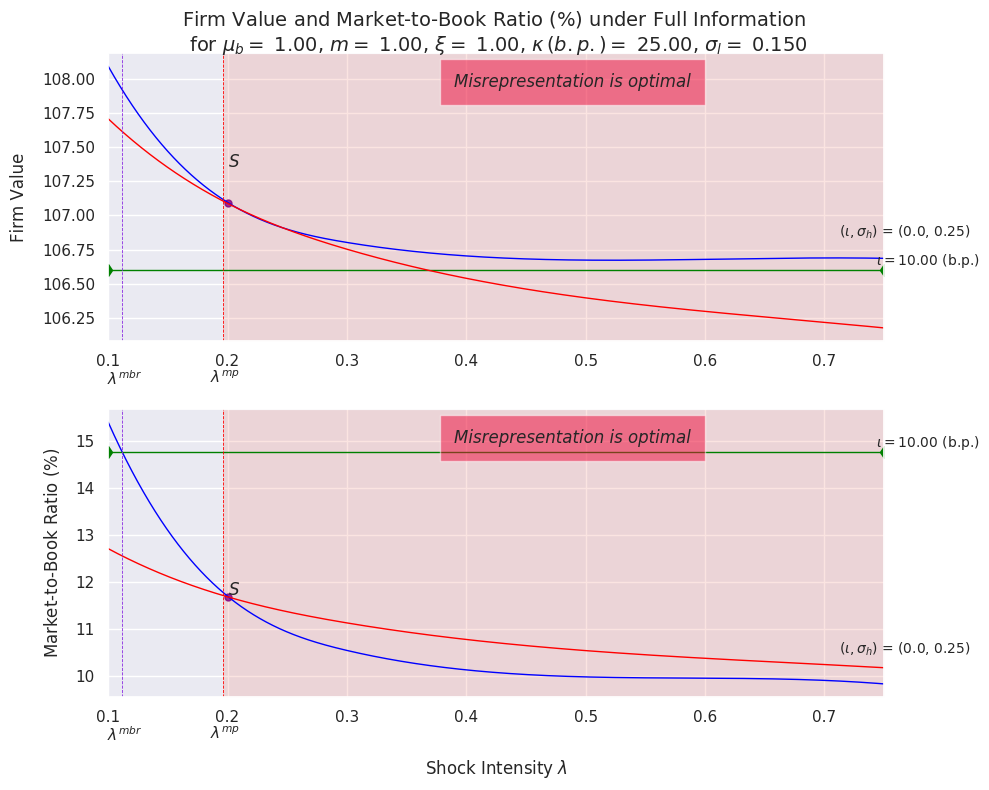

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using (m, m_comb_num) ID pair...


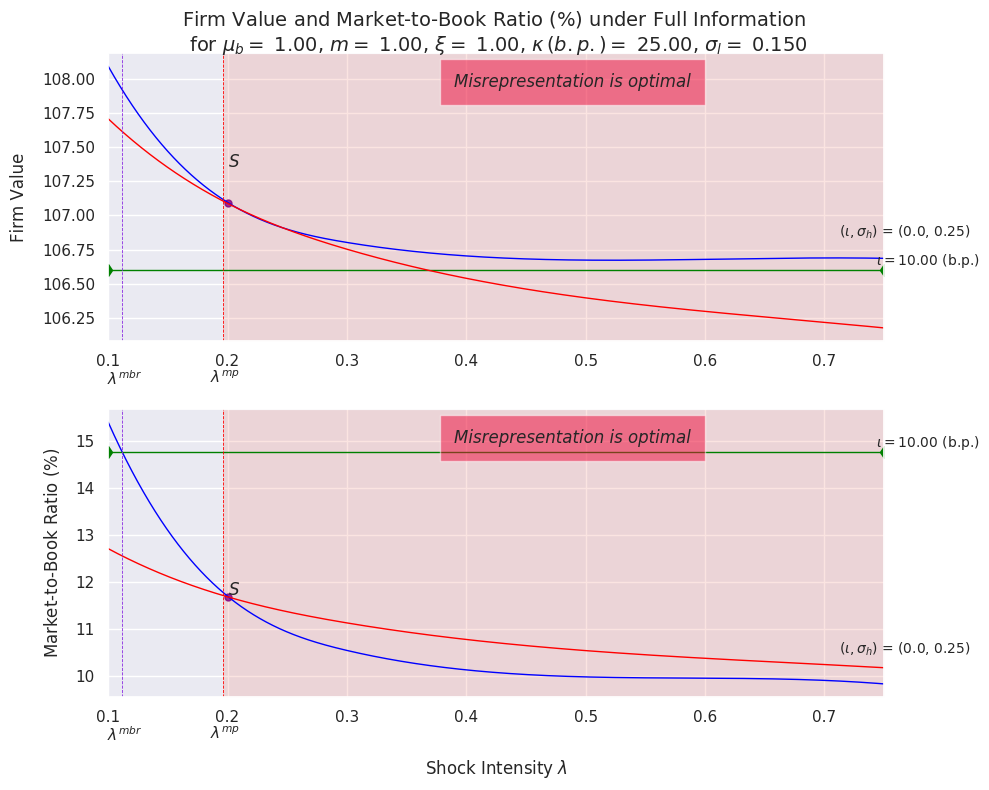

In [392]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plots_xvar_dir = "rmp_lambda"
plot_script_name = "rmp_misrep_lambda_plots.jl"
#cvmdf, svmdf, misrepdf, fv_lambda, mbr_lambda, misrep_lambda = 
include(string(plot_script_path, "/", plots_xvar_dir, "/", plot_script_name))

In [389]:
misrep_lambda

0.19583045830458304

In [384]:
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

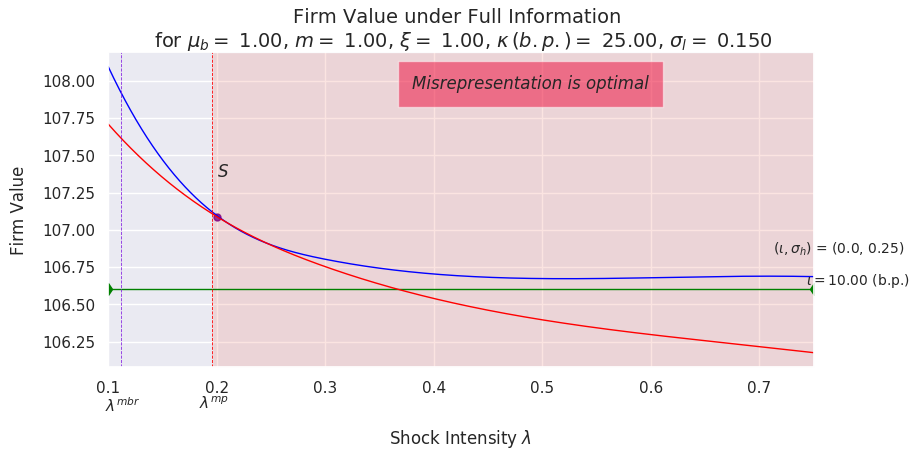

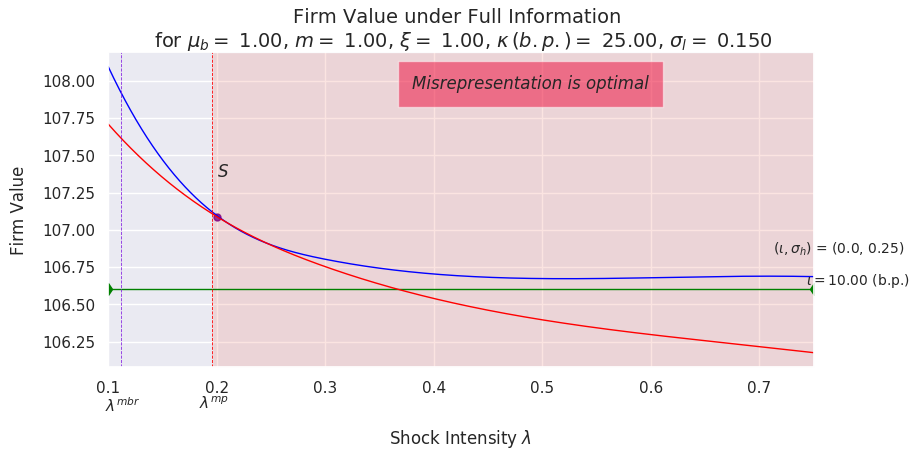

In [390]:
fv_fig = ModelPlots.rmp_fi_plotfun(:lambda, [:firm_value], 
                                   deepcopy(cvmdf), deepcopy(svmdf),
                                   interp_yvar=true,
                                   misrepdf=deepcopy(misrepdf),
                                   fv_xvar=fv_lambda,
                                   mbr_xvar=mbr_lambda,
                                   misrep_xvar=misrep_lambda,
                                   color_rm_region=false,
                                   color_nrm_region=false,
                                   color_conflict_region=false,
                                   color_misrep_region=true, 
                                   save_fig=true)





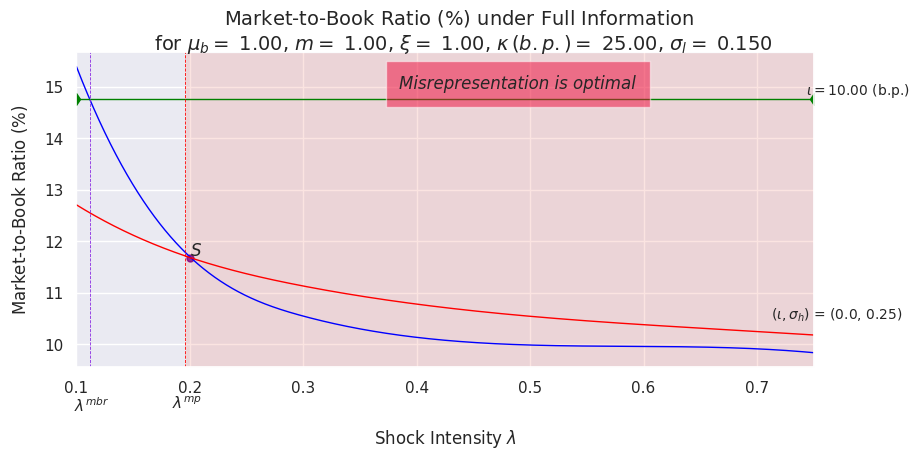

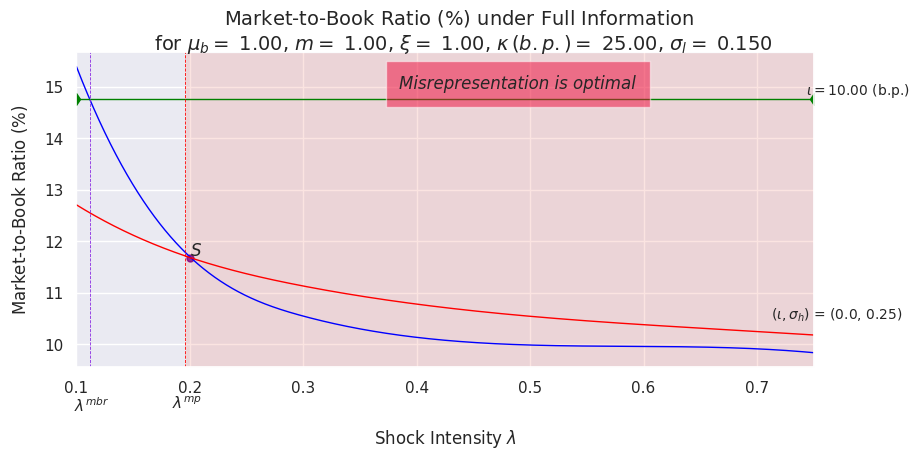

In [391]:
fv_fig = ModelPlots.rmp_fi_plotfun(:lambda, [:MBR], 
                                   deepcopy(cvmdf), deepcopy(svmdf),
                                   interp_yvar=true,
                                   misrepdf=deepcopy(misrepdf),
                                   fv_xvar=fv_lambda,
                                   mbr_xvar=mbr_lambda,
                                   misrep_xvar=misrep_lambda,
                                   color_rm_region=false,
                                   color_nrm_region=false,
                                   color_conflict_region=false,
                                   color_misrep_region=true, 
                                   save_fig=true)


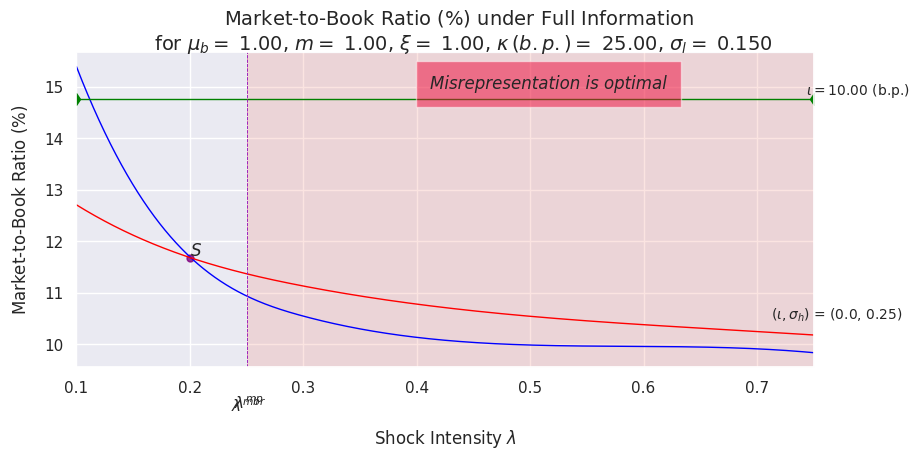

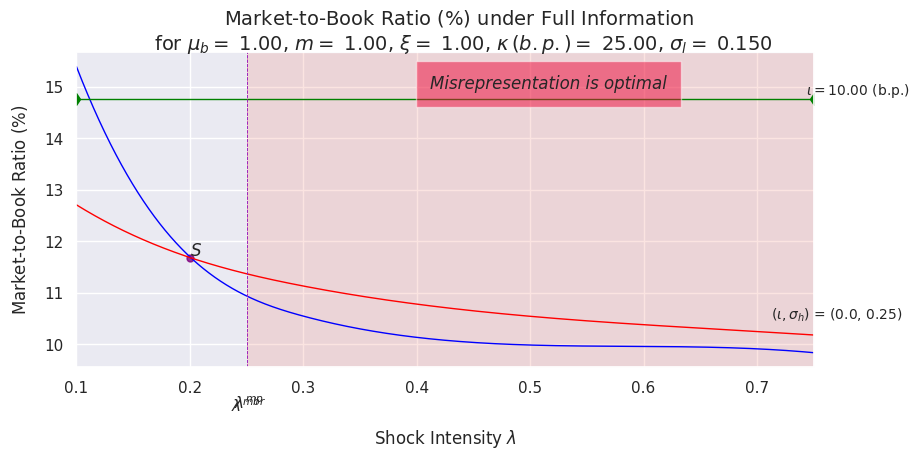

In [372]:
fv_fig = ModelPlots.rmp_fi_plotfun(:lambda, [:MBR], 
                                   deepcopy(cvmdf), deepcopy(svmdf),
                                   interp_yvar=true,
                                   misrepdf=deepcopy(misrepdf),
                                   fv_xvar=fv_sigmah,
                                   mbr_xvar=mbr_sigmah,
                                   misrep_xvar=misrep_sigmah,
                                   color_rm_region=false,
                                   color_nrm_region=false,
                                   color_conflict_region=false,
                                   color_misrep_region=true, 
                                   save_fig=true)

In [360]:
misrep_lambda

UndefVarError: UndefVarError: misrep_lambda not defined

In [358]:
mbr_lambda

0.11176511765117651

In [306]:
modls = ["ModelObj", "AnalyticFunctions", "BondPrInterp",
         "EqFinDiff", "Batch", "ModelPlots", "JointEq"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [307]:
df = JointEq.compile_opt_vb_results(ep_jf, misrep_jks, msfdf, mrfdf)

Computing Equity Vmax
Vmax: 125.0
phi0: -42.02546178023292
phi1: 0.9749999999999998
pv_rfdebt: 55.82789780462158
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.02546178023292
phi1: 0.9999999999999998
pv_rfdebt: 55.82789780462158
debt_abs_per_diff: 8.663335019052527e-10
eq_abs_per_diff: 0.0009880505410821121
Equity Vmax: 286.50228972512923
 
eq_max: 1.5616196775804345
eq_vbl: 0.0
eq_vbl: 0.0
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 53.378359450390796
Equity Core Function Computation Time: 0.05932307243347168
Total Equity FD Core Function Computation Time: 0.17952489852905273
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008193016052246094
 
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 100.0; equity: 53.19611203632002
Equity Core Function Computation Time: 0.05762004852294922
Total Equity FD Core Function Computa

Computing equity values... 
V0: 100.0; equity: 53.24708912376167
Equity Core Function Computation Time: 0.05072212219238281
Total Equity FD Core Function Computation Time: 0.12801790237426758
Total computation time: 0.3096020221710205
Computing Equity Vmax
Vmax: 125.0
phi0: -42.02546178023292
phi1: 0.9749999999999998
pv_rfdebt: 55.82789780462158
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Vmax: 125.0
phi0: -42.02546178023292
phi1: 0.9999999999999998
pv_rfdebt: 55.82789780462158
debt_abs_per_diff: 8.663335019052527e-10
eq_abs_per_diff: 0.0009880505410821121
Equity Vmax: 286.50228972512923
 
eq_max: 1.5552134931276567
Computing Equity Vmax
Vmax: 125.0
phi0: -42.02546178023292
phi1: 0.9749999999999998
pv_rfdebt: 55.82789780462158
debt_abs_per_diff: NaN
eq_abs_per_diff: NaN
Equity Vmax: 131.25
 
eq_max: 85.4865800597506
eq_vbl: 0.0
Shape of Gamma matrix: (1498,)
Computing equity values... 
V0: 60.49332540431148; equity: 0.04016796248537524
Equity Core Function Computation Time: 0.050482988

,sf_defaults_first,fi_vb,sf_vb,rf_vb,vb,eq_deriv,eq_min_val,mu_s,m,mu_b,c,p,eq_deriv_min_val,eq_negative,eq_vb,MBR,debt,equity,firm_value,leverage,iota,lambda,sigmah,gross_delta,delta,kappa,sigmal,V0,xi,r,alpha,pi
,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,true,60.1019,60.107,NaN,60.107,-1.30995e-6,0.00105638,1.0,1.0,1.0,4.60654,55.8275,-1.30995e-6,false,0.0,20.8404,55.8274,53.3784,109.206,51.1213,0.0005,NaN,NaN,0.02,0.0195,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
2,true,60.8567,NaN,60.107,60.107,-0.18767,-0.032363,1.0,1.0,1.0,4.60654,55.8275,-0.18767,false,0.0,20.4278,55.8274,53.1961,109.023,51.2067,0.0,0.2,0.2,0.02,0.02,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
3,true,60.1019,60.9225,NaN,60.9225,0.147742,0.0102896,1.0,1.0,1.0,4.60654,55.8275,0.147742,false,0.0,20.4251,55.8272,53.1952,109.022,51.2071,0.0005,NaN,NaN,0.02,0.0195,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
4,true,60.8567,NaN,60.8567,60.9225,0.000366573,0.0021442,1.0,1.0,1.0,4.60654,55.8275,0.000366573,false,0.00110913,20.2616,55.8272,53.123,108.95,51.241,0.0,0.2,0.2,0.02,0.02,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
5,false,60.1019,60.0572,NaN,60.0572,-0.00916457,0.000486666,1.0,1.0,1.0,4.60654,55.8275,-0.00916457,false,0.0,20.8648,55.8274,53.3891,109.217,51.1162,0.0005,NaN,NaN,0.02,0.0195,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
6,false,60.8567,NaN,60.0572,60.0572,-0.199227,-0.0365326,1.0,1.0,1.0,4.60654,55.8275,-0.199227,false,0.0,20.4374,55.8274,53.2003,109.028,51.2048,0.0,0.2,0.2,0.02,0.02,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
7,false,60.1019,60.1019,NaN,60.4589,0.18368,0.0460118,1.0,1.0,1.0,4.60654,55.8275,0.18368,false,0.0335084,20.8429,55.8274,53.3795,109.207,51.1208,0.0005,NaN,NaN,0.02,0.0195,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
8,false,60.8567,NaN,60.4589,60.4589,-0.00282336,0.00082495,1.0,1.0,1.0,4.60654,55.8275,-0.00282336,false,0.0,20.4304,55.8274,53.1973,109.025,51.2062,0.0,0.2,0.2,0.02,0.02,0.0025,0.15,100.0,1.0,0.08,0.6,0.27


In [308]:
dff = JointEq.filter_joint_vb_results(df)

,sf_defaults_first,fi_vb,sf_vb,rf_vb,vb,eq_deriv,eq_min_val,mu_s,m,mu_b,c,p,eq_deriv_min_val,eq_negative,eq_vb,MBR,debt,equity,firm_value,leverage,iota,lambda,sigmah,gross_delta,delta,kappa,sigmal,V0,xi,r,alpha,pi
,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,false,60.1019,60.1019,NaN,60.4589,0.18368,0.0460118,1.0,1.0,1.0,4.60654,55.8275,0.18368,false,0.0335084,20.8429,55.8274,53.3795,109.207,51.1208,0.0005,NaN,NaN,0.02,0.0195,0.0025,0.15,100.0,1.0,0.08,0.6,0.27
2,false,60.8567,NaN,60.4589,60.4589,-0.00282336,0.00082495,1.0,1.0,1.0,4.60654,55.8275,-0.00282336,false,0.0,20.4304,55.8274,53.1973,109.025,51.2062,0.0,0.2,0.2,0.02,0.02,0.0025,0.15,100.0,1.0,0.08,0.6,0.27


In [236]:
tol1=-1e-2
tol2=1e-2

# Limited Liability Conditions ############################
cond1 = df -> .&([df[x] .>= tol1 for x in [:eq_deriv, :eq_min_val]]...)

# When the Safe Firm defaults first, 
# its equity and equity derivative should be zero
# at the joint default barrier
sf_cond = df -> .&(df[:sf_defaults_first], 
                   isnan.(df[:sf_vb]) .| (df[:eq_deriv] .<= tol2))

# When the Risky Firm defaults first, 
# its equity and equity derivative should be zero
# at the joint default barrier
rf_cond = df -> .&(df[:sf_defaults_first] .==false, 
                   isnan.(df[:rf_vb]) .| (df[:eq_deriv] .<= tol2))

# Limited Liability Conditions must be satisfied by both firms:
llcond = df -> sum(.&(cond1(df), (sf_cond(df) .| rf_cond(df)))) == 2
# #########################################################

# ## Find vb candidates
# vbdf = by(df, :vb, llcond = names(df) => x -> llcond(x))
# vblist = vbdf[vbdf[:llcond], :vb]



#175 (generic function with 1 method)

# TRASH

In [ ]:
xy_list = [:sigmah, :kappa]
z_vars = ["firm_value", "equity", "debt", "c", "p", "vb", "leverage", "ROE"]
fig_name_vars = ["mu_b", "m", "xi", "lambda", "sigmal"]

comb_mat = hcat(bt._params_combs...)'
value_lists = 
[[1]] + [param_values_dict[x] for x in fig_name_vars[1:]]
combinations = np.array(np.meshgrid(*value_lists)).T.reshape(-1, len(fig_name_vars))
    
# value_lists = [[1]] + [np.asarray(item[1]) for item in param_values_dict.items() if item[0] in fig_name_vars]
# value_lists = [[1]] + [np.array(param_values_dict[x]) for x in fig_name_vars[1:]]
# combinations = np.array(np.meshgrid(*value_lists)).T.reshape(-1, len(fig_name_vars))

# All variables but equity:
grph_dict1 = Dict("azim" => 50,
                  "order_ascend" => true,
                  "reorder_x" => false)

# Equity:
grph_dict2 = Dict("azim" => -50,
                  "order_ascend" => true,
                  "reorder_x" => false)
